<a href="https://colab.research.google.com/github/Isaiasduda/Projeto-Analise-de-dados-com-python/blob/main/Projeto_de_Analise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [ ]:
#ler os dados
Base_Dados = pd.read_csv('/content/Startups+in+2021+end.csv')

#verifica os registros
Base_Dados.shape

(936, 8)

In [ ]:
Base_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
Base_Dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [ ]:
Base_Dados.rename ( columns = {
    'Unnamed: 0': 'Id',
    'Company' :'Companinha',
    'Valuation' : 'valor',
    'Data Joined' : 'Data de Adesao',
    'Country' : 'Pais',
    'City': 'Cidade',
    'Industry': 'Setor',
    'Select Investors ': 'Investidores',
}, inplace=True

)

In [ ]:
#verificar o tipo da informacao
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                936 non-null    int64 
 1   Companinha        936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Pais              936 non-null    object
 5   Cidade            921 non-null    object
 6   Setor             936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
#verifica os campos nulos e soma a quantidade
Base_Dados.isnull().sum()

Id                   0
Companinha           0
Valuation ($B)       0
Date Joined          0
Pais                 0
Cidade              15
Setor                0
Select Investors     1
dtype: int64

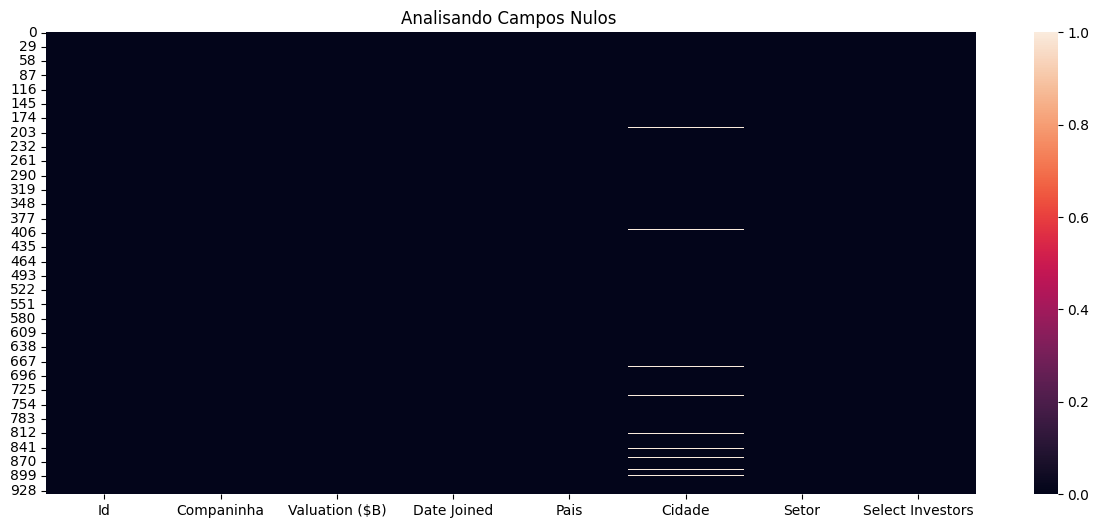

In [ ]:
#visualizacao grafica da tabela
plt.figure (figsize=(15,6))
plt.title('Analisando Campos Nulos ')
sns.heatmap(Base_Dados.isnull());# ; usado no final para tirar um titulo que aparece acima do grafico

In [ ]:
#campos unicos
Base_Dados.nunique()

Id                  936
Companinha          935
Valuation ($B)      192
Date Joined         589
Pais                 47
Cidade              239
Setor                17
Select Investors    920
dtype: int64

In [ ]:
#valores unicos
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [ ]:
#valores unicos em rank
Base_Dados['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [ ]:
#valores unicos em rank, em %
Base_Dados['Setor'].value_counts(normalize=True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Fintech'),
  Text(1, 0, 'Internet software & services'),
  Text(2, 0, 'E-commerce & direct-to-consumer'),
  Text(3, 0, 'Artificial intelligence'),
  Text(4, 0, 'Health'),
  Text(5, 0, 'Supply chain, logistics, & delivery'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'Cybersecurity'),
  Text(8, 0, 'Mobile & telecommunications'),
  Text(9, 0, 'Data management & analytics'),
  Text(10, 0, 'Hardware'),
  Text(11, 0, 'Auto & transportation'),
  Text(12, 0, 'Edtech'),
  Text(13, 0, 'Consumer & retail'),
  Text(14, 0, 'Travel'),
  Text(15, 0, 'Artificial Intelligence'),
  Text(16, 0, 'Finttech')])

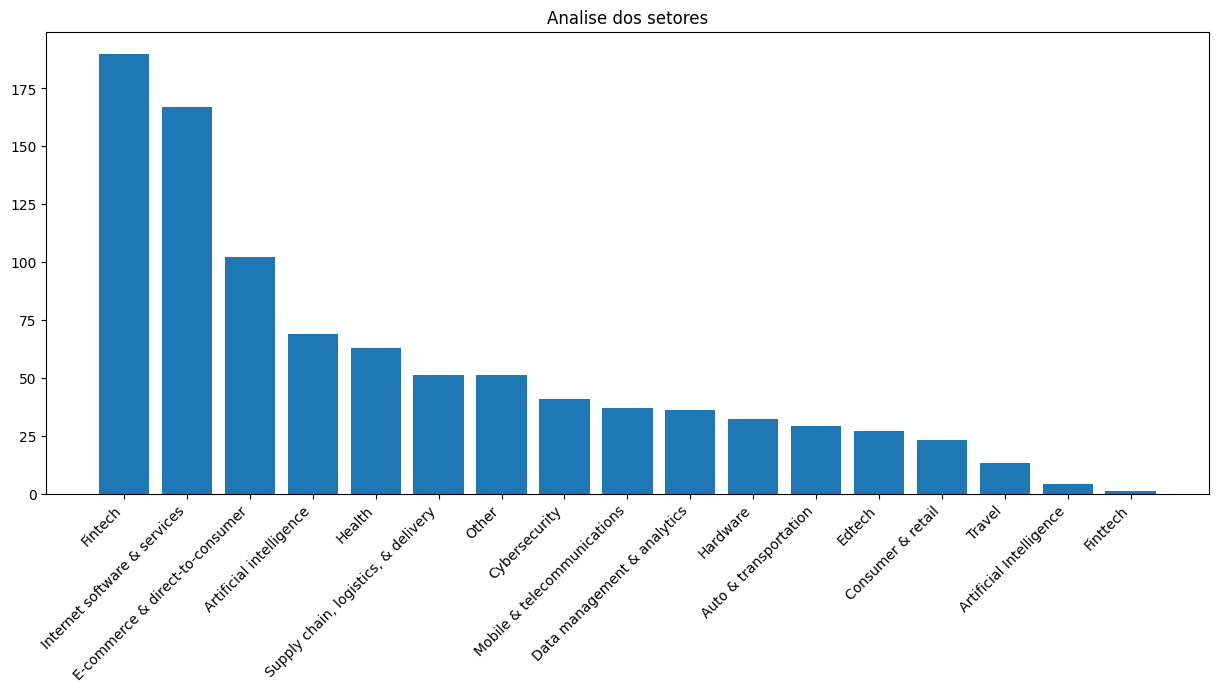

In [ ]:
plt.figure(figsize=(15, 6))
plt.title('Analise dos setores')

plt.bar(Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts() );

plt.xticks(rotation = 45, ha= 'right') #direciona os titulos da parte abaixo na tabela

In [ ]:
Analise = round (Base_Dados['Pais'].value_counts(normalize=True) * 100, 1) # round e o 1 no final deixa apenas uma casa decimal

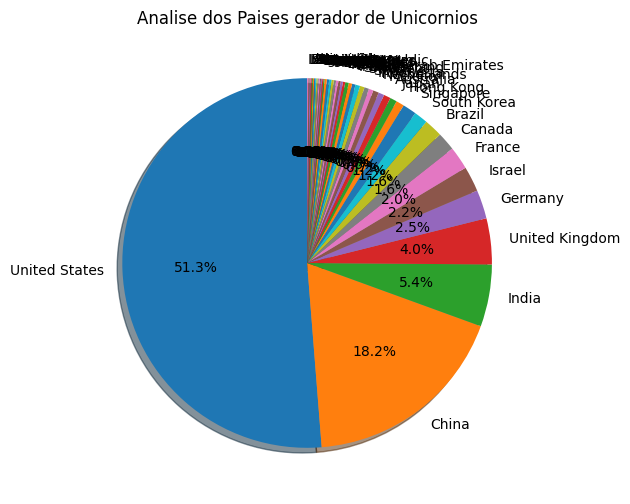

In [ ]:
plt.figure(figsize= (15, 6))
plt.title('Analise dos Paises gerador de Unicornios')
plt.pie(
    Analise,
    labels= Analise.index,
    shadow= True,
    startangle=90,
    autopct='%1.1f%%'
);